In [1]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)

2.8.0
2.8.0


In [2]:
# Use the ! prefix to run shell commands in Jupyter notebook
!conda init
!conda activate ai_lab
!conda install -c conda-forge libsndfile python-soundfile

no change     /opt/anaconda3/condabin/conda
no change     /opt/anaconda3/bin/conda
no change     /opt/anaconda3/bin/conda-env
no change     /opt/anaconda3/bin/activate
no change     /opt/anaconda3/bin/deactivate
no change     /opt/anaconda3/etc/profile.d/conda.sh
no change     /opt/anaconda3/etc/fish/conf.d/conda.fish
no change     /opt/anaconda3/shell/condabin/Conda.psm1
no change     /opt/anaconda3/shell/condabin/conda-hook.ps1
no change     /opt/anaconda3/lib/python3.13/site-packages/xontrib/conda.xsh
no change     /opt/anaconda3/etc/profile.d/conda.csh
no change     /Users/parkjoehyun/.bash_profile
No action taken.

CondaError: Run 'conda init' before 'conda activate'

Jupyter detected...
2 channel Terms of Service accepted
doneieving notices: - 
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
failedg environment: - 

PackagesNotFoundError: The following packages are not available from current channels:

  - python-soundfile


In [3]:
%pip install soundfile

Note: you may need to restart the kernel to use updated packages.


In [11]:
import os, glob, subprocess, shutil, tempfile
import torch
import torchaudio
import matplotlib.pyplot as plt

def ensure_ffmpeg():
    if shutil.which("ffmpeg") is None:
        raise RuntimeError("ffmpeg 설치 필요: 터미널에서 `brew install ffmpeg` 실행")

def convert_to_wav_if_needed(path: str) -> str:
    """입력 파일을 wav 변환"""
    ext = os.path.splitext(path)[1].lower()
    if ext == ".wav":
        return path
    ensure_ffmpeg()
    wav_path = os.path.splitext(path)[0] + ".wav"
    if not os.path.exists(wav_path):
        cmd = ["ffmpeg", "-y", "-i", path, wav_path]
        print("Converting:", " ".join(cmd))
        subprocess.run(cmd, check=True)
    return wav_path

def pick_first_audio_file(data_dir="./audio_dataset") -> str:
    files = sorted(
        glob.glob(os.path.join(data_dir, "*.wav")) +
        glob.glob(os.path.join(data_dir, "*.m4a")) +
        glob.glob(os.path.join(data_dir, "*.mp3"))
    )
    if not files:
        raise FileNotFoundError(f"{data_dir} 폴더에 오디오 파일이 없습니다.")
    return files[0]




=== 095522039.wav ===
 - shape=(1, 177152) | sr=44100


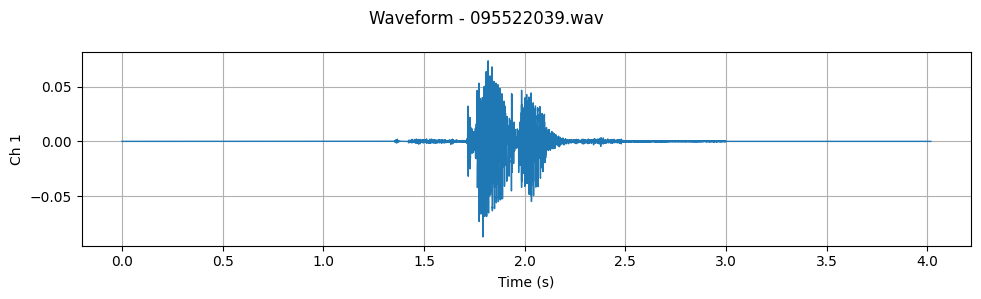

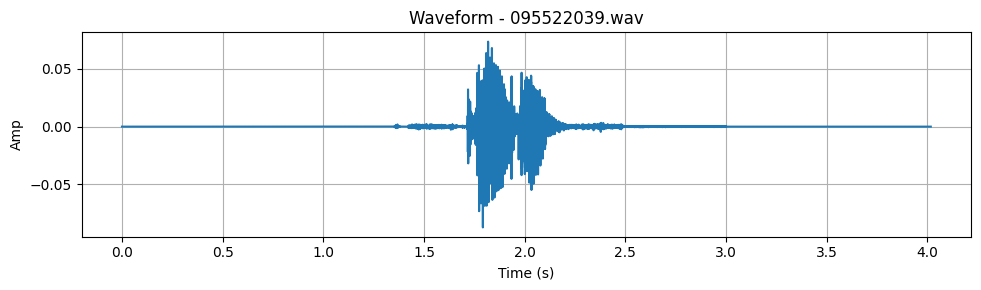

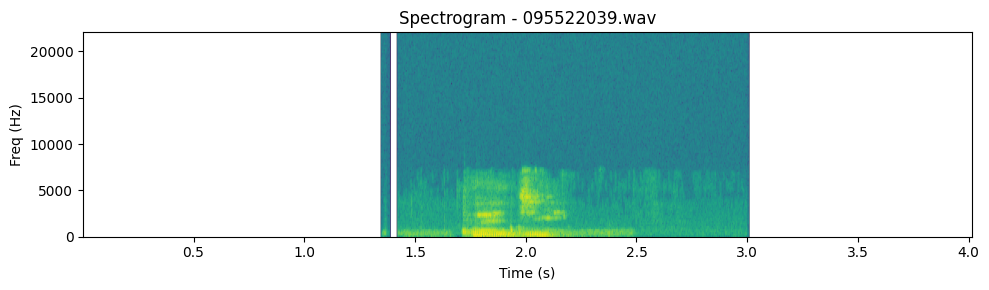


=== 095522040.wav ===
 - shape=(1, 177152) | sr=44100


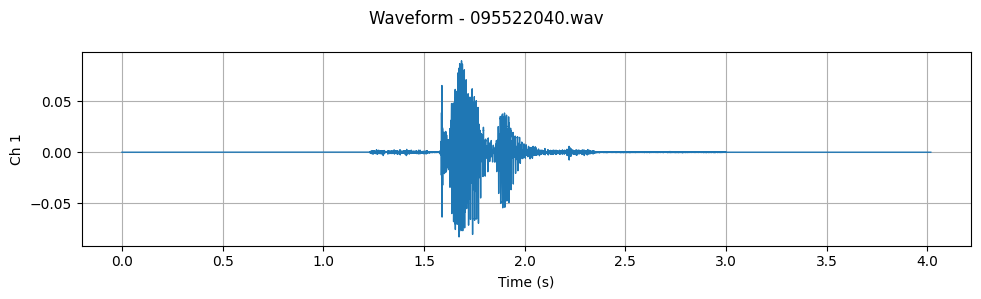

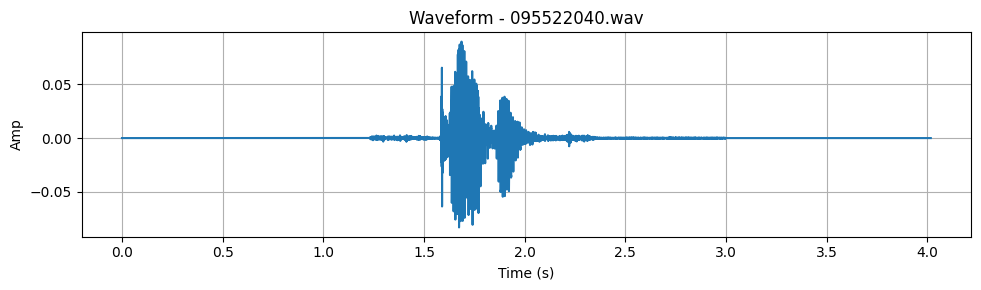

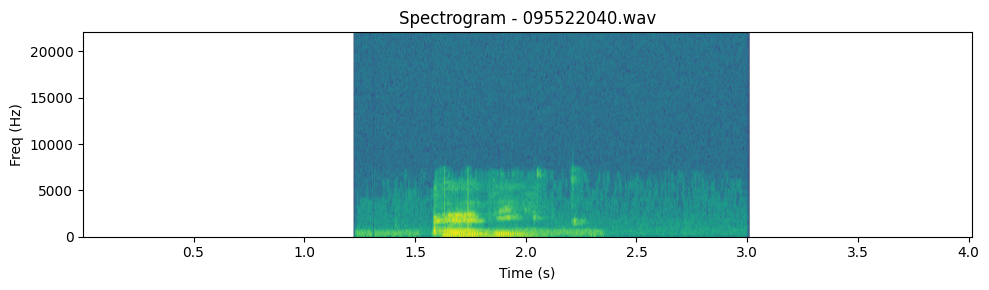


=== 095522041.wav ===
 - shape=(1, 177152) | sr=44100


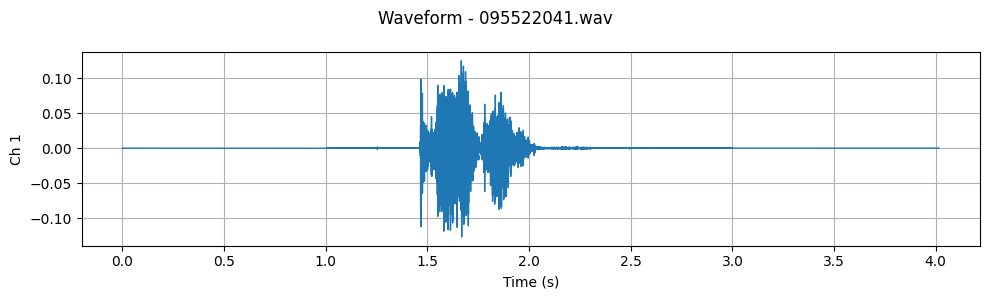

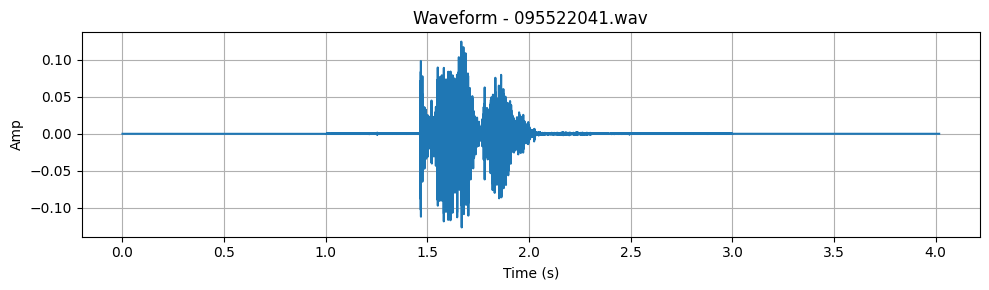

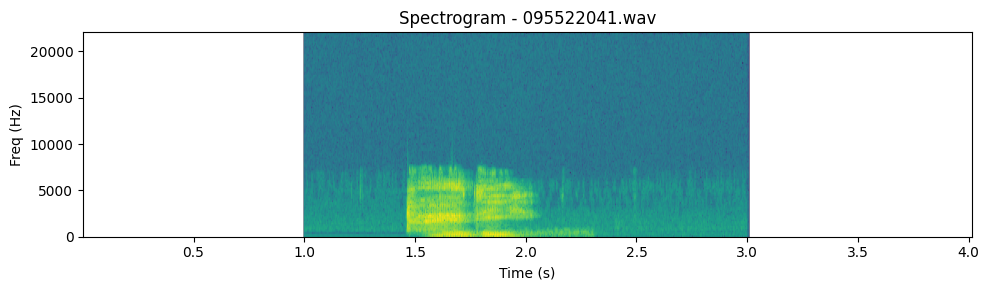


=== 095522042.wav ===
 - shape=(1, 177152) | sr=44100


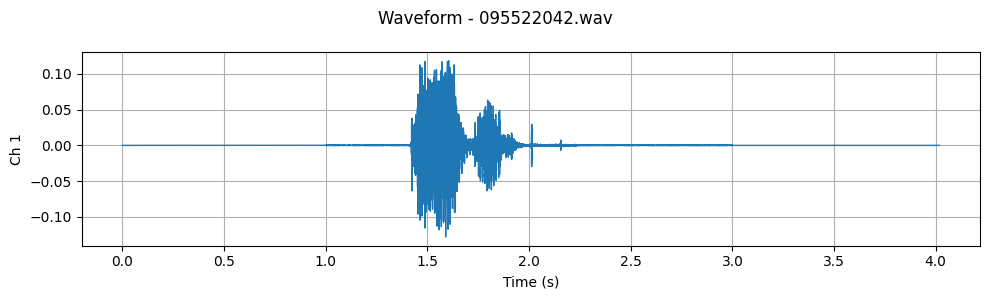

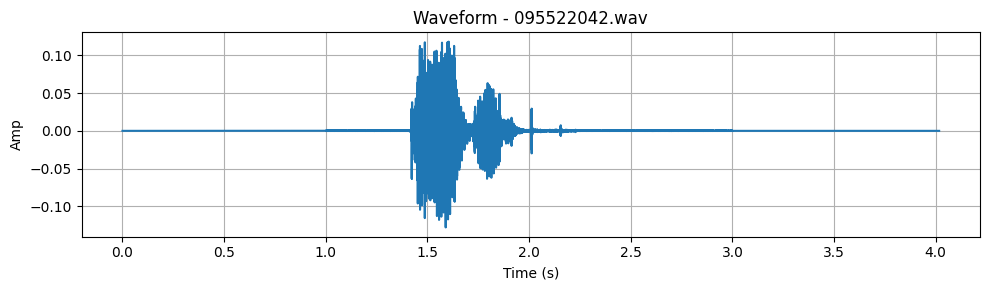

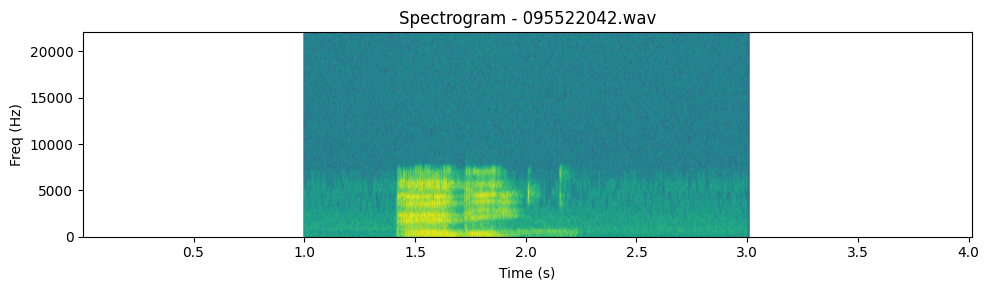

In [12]:
DATA_DIR = "./audio_dataset"

files = sorted(glob.glob(os.path.join(DATA_DIR, "*.m4a")) +
               glob.glob(os.path.join(DATA_DIR, "*.mp3")))

assert files, f"{DATA_DIR} 폴더에 오디오 파일이 없습니다."

for src_path in files:
    wav_path = convert_to_wav_if_needed(src_path)   # m4a/mp3면 ffmpeg로 1회 변환
    # torchaudio로 직접 로드 (librosa 불필요)
    waveform, sample_rate = torchaudio.load(wav_path)  # [channels, frames]

    print(f"\n=== {os.path.basename(wav_path)} ===")
    print(f" - shape={tuple(waveform.shape)} | sr={sample_rate}")

    # 파형 / 스펙트로그램 그리기 (이미 가지고 있는 함수가 있다면 그걸 쓰세요)
    try:
        plot_waveform(waveform, sample_rate, f"Waveform - {os.path.basename(wav_path)}")
        plot_specgram(waveform, sample_rate, f"Spectrogram - {os.path.basename(wav_path)}")
    except NameError:
        # 최소 대체: 간단 파형/스펙트로그램
        import matplotlib.pyplot as plt
        t = torch.arange(waveform.shape[1]) / sample_rate
        plt.figure(figsize=(10,3))
        plt.plot(t, waveform[0].numpy()); plt.title(f"Waveform - {os.path.basename(wav_path)}")
        plt.xlabel("Time (s)"); plt.ylabel("Amp"); plt.grid(True); plt.tight_layout(); plt.show()

        plt.figure(figsize=(10,3))
        plt.specgram(waveform[0].numpy(), Fs=sample_rate)
        plt.title(f"Spectrogram - {os.path.basename(wav_path)}")
        plt.xlabel("Time (s)"); plt.ylabel("Freq (Hz)"); plt.tight_layout(); plt.show()



In [9]:
for src_path in files:
    # 1. m4a/mp3면 ffmpeg으로 변환, 이미 wav면 그대로 둠
    wav_path = convert_to_wav_if_needed(src_path)   

    # 2. torchaudio로 로드 (이제 wav 확정이라 에러 없음)
    waveform, sample_rate = torchaudio.load(wav_path)  

    print(f"Loaded: {wav_path}")
    print(f" - shape={tuple(waveform.shape)} | sr={sample_rate}")
    print("Metadata:", torchaudio.info(wav_path))

Loaded: ./audio_dataset/095522039.wav
 - shape=(1, 177152) | sr=44100
Metadata: AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=16, encoding=PCM_S)
Loaded: ./audio_dataset/095522039.wav
 - shape=(1, 177152) | sr=44100
Metadata: AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=16, encoding=PCM_S)
Loaded: ./audio_dataset/095522040.wav
 - shape=(1, 177152) | sr=44100
Metadata: AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=16, encoding=PCM_S)
Loaded: ./audio_dataset/095522040.wav
 - shape=(1, 177152) | sr=44100
Metadata: AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=16, encoding=PCM_S)
Loaded: ./audio_dataset/095522041.wav
 - shape=(1, 177152) | sr=44100
Metadata: AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=16, encoding=PCM_S)
Loaded: ./audio_dataset/095522041.wav
 - shape=(1, 177152) | sr=44100
Metadata: 

/var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/ipykernel_4063/3413404478.py:10: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  print("Metadata:", torchaudio.info(wav_path))
/opt/anaconda3/envs/ai_lab/lib/python3.10/site-packages/torchaudio/_backend/soundfile_backend.py:120: UserWarning: torchaudio._backend.common.AudioMetaData has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more i

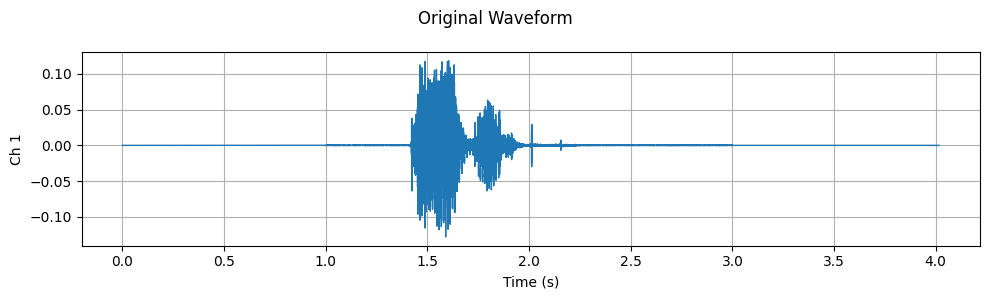

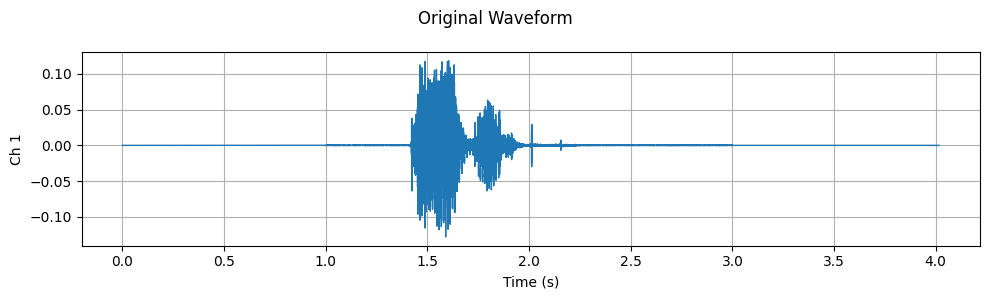

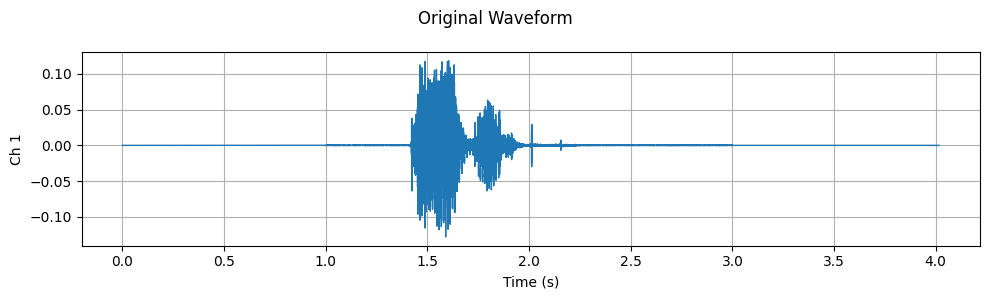

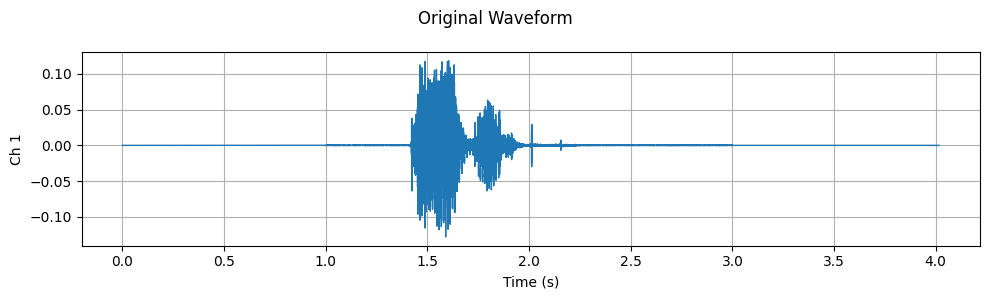

In [13]:
def plot_waveform(waveform, sample_rate, title="Waveform"):
    wf = waveform.numpy()
    num_channels, num_frames = wf.shape
    t = torch.arange(num_frames) / sample_rate
    fig, axes = plt.subplots(num_channels, 1, figsize=(10, 3))
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(t, wf[c], linewidth=1)
        axes[c].grid(True)
        axes[c].set_ylabel(f"Ch {c+1}")
    fig.suptitle(title)
    plt.xlabel("Time (s)")
    plt.tight_layout()
    plt.show()

for src_path in files:
    plot_waveform(waveform, sample_rate, "Original Waveform")

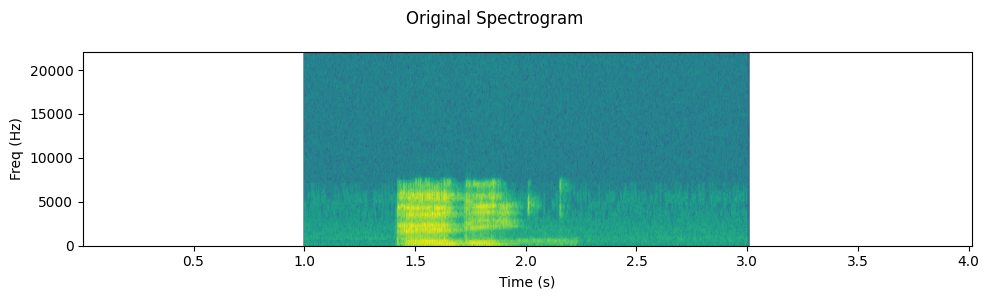

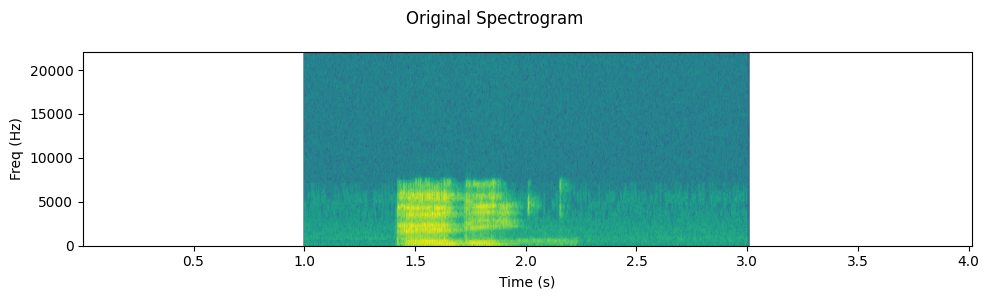

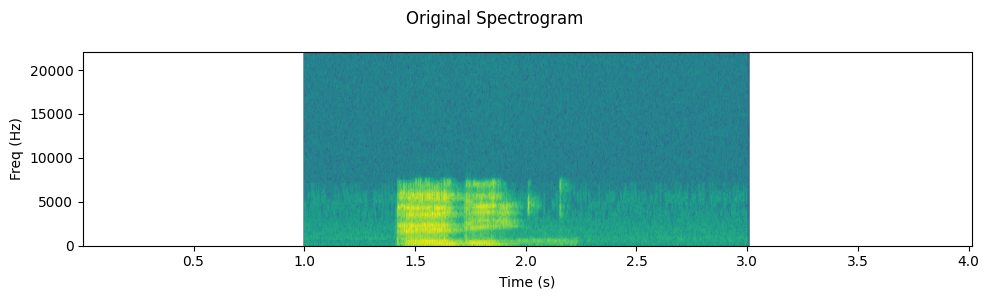

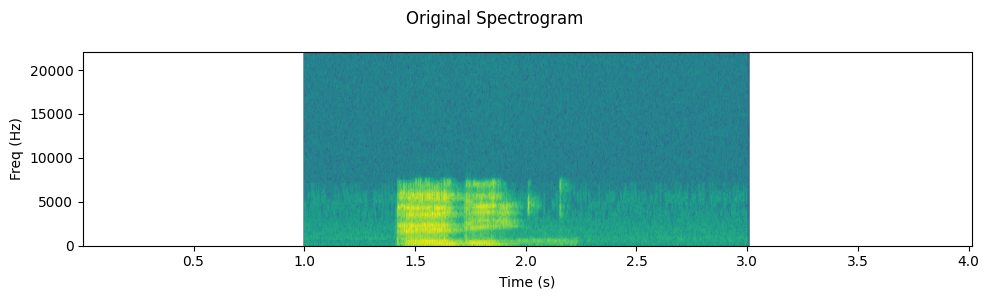

In [15]:
def plot_specgram(waveform, sample_rate, title="Spectrogram"):
    wf = waveform.numpy()
    num_channels, _ = wf.shape
    fig, axes = plt.subplots(num_channels, 1, figsize=(10, 3))
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].specgram(wf[c], Fs=sample_rate)
        axes[c].set_ylabel("Freq (Hz)")
    fig.suptitle(title)
    plt.xlabel("Time (s)")
    plt.tight_layout()
    plt.show()
for wav_path in files:
    plot_specgram(waveform, sample_rate, "Original Spectrogram")

In [17]:
from IPython.display import Audio

for wav_path in files:
    Audio(waveform.numpy()[0], rate=sample_rate)

In [18]:
def inspect_file(path):
    print("-" * 10)
    print("Source:", path)
    print("-" * 10)
    print(f" - File size: {os.path.getsize(path)} bytes")
    print(f" - {torchaudio.info(path)}")
    print()

# 저장 예제
for wav_path in files:
    with tempfile.TemporaryDirectory() as tempdir:
        path = f"{tempdir}/save_example_default.wav"
        torchaudio.save(path, waveform, sample_rate)   # wav로 저장
        inspect_file(path)

----------
Source: /var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/tmpy9xjh1j8/save_example_default.wav
----------
 - File size: 708688 bytes
 - AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=32, encoding=PCM_F)

----------
Source: /var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/tmp5ht5wtwo/save_example_default.wav
----------
 - File size: 708688 bytes
 - AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=32, encoding=PCM_F)

----------
Source: /var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/tmp3lc0zbyd/save_example_default.wav
----------
 - File size: 708688 bytes
 - AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=32, encoding=PCM_F)

----------
Source: /var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/tmp59cr5jo0/save_example_default.wav
----------
 - File size: 708688 bytes
 - AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=32, encoding=PCM_

/opt/anaconda3/envs/ai_lab/lib/python3.10/site-packages/torchaudio/_backend/utils.py:337: UserWarning: In 2.9, this function's implementation will be changed to use torchaudio.save_with_torchcodec` under the hood. Some parameters like format, encoding, bits_per_sample, buffer_size, and ``backend`` will be ignored. We recommend that you port your code to rely directly on TorchCodec's encoder instead: https://docs.pytorch.org/torchcodec/stable/generated/torchcodec.encoders.AudioEncoder
  warnings.warn(
/var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/ipykernel_4063/2752890836.py:6: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  print

In [19]:
# 16bit PCM 저장
for wav_path in files:
    with tempfile.TemporaryDirectory() as tempdir:
        path = f"{tempdir}/save_example_PCM_S16.wav"
        torchaudio.save(path, waveform, sample_rate, encoding="PCM_S", bits_per_sample=16)
        inspect_file(path)

----------
Source: /var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/tmpycm6tmw5/save_example_PCM_S16.wav
----------
 - File size: 354348 bytes
 - AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=16, encoding=PCM_S)

----------
Source: /var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/tmp93_oxr5r/save_example_PCM_S16.wav
----------
 - File size: 354348 bytes
 - AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=16, encoding=PCM_S)

----------
Source: /var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/tmpcam21xrx/save_example_PCM_S16.wav
----------
 - File size: 354348 bytes
 - AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=16, encoding=PCM_S)

----------
Source: /var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/tmp6uc_2wxp/save_example_PCM_S16.wav
----------
 - File size: 354348 bytes
 - AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=16, encoding=PCM_

/var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/ipykernel_4063/2752890836.py:6: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  print(f" - {torchaudio.info(path)}")


In [20]:
# FLAC 저장 예제
for wav_path in files:
    formats = ["flac"]  # 필요한 포맷만 남김
    with tempfile.TemporaryDirectory() as tempdir:
        for fmt in formats:
            path = f"{tempdir}/save_example.{fmt}"
            torchaudio.save(path, waveform, sample_rate, format=fmt)
            inspect_file(path)

----------
Source: /var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/tmpyr62z1ne/save_example.flac
----------
 - File size: 38052 bytes
 - AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=16, encoding=FLAC)

----------
Source: /var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/tmpdw2bkx03/save_example.flac
----------
 - File size: 38052 bytes
 - AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=16, encoding=FLAC)

----------
Source: /var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/tmp3i4rqti1/save_example.flac
----------
 - File size: 38052 bytes
 - AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=16, encoding=FLAC)

----------
Source: /var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/tmpmv1crz13/save_example.flac
----------
 - File size: 38052 bytes
 - AudioMetaData(sample_rate=44100, num_frames=177152, num_channels=1, bits_per_sample=16, encoding=FLAC)



/var/folders/_8/5nkrzgyx6xdgk2_9b4gmkdgc0000gn/T/ipykernel_4063/2752890836.py:6: UserWarning: torchaudio._backend.utils.info has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  print(f" - {torchaudio.info(path)}")


In [21]:
# 메모리에 저장 (BytesIO)
import io
for wav_path in files:
    buffer_ = io.BytesIO()
    torchaudio.save(buffer_, waveform, sample_rate, format="wav")
    buffer_.seek(0)
    print(buffer_.read(16))

b'RIFFH\xd0\n\x00WAVEfmt '
b'RIFFH\xd0\n\x00WAVEfmt '
b'RIFFH\xd0\n\x00WAVEfmt '
b'RIFFH\xd0\n\x00WAVEfmt '
